# Introduction

The data contains semi-structured data on GDP, Total Population, Female Population Percentage and Country to Region Mapping  for various countries between 2015 - 2017 and the source of data is World Bank. The World Bank data set is a subset of data extracted from the primary World Bank collection of development indicators, compiled from officially-recognized international sources.           

* `GDP`: Includes GDP data for countries from 2015 to 2017.
* `Total_Population`: Includes Total population data for countries from 2015 to 2017.
* `Female_Population_Percentage`: Includes female population percentage data for countries from 2015 to 2017.
* `Countries`: Includes country mapping data.

The GDP per capita, in current US dollars, is the quantitative response variable. Gross
Domestic Product is a measure of output of a country, created by taking the monetary value of
all finished goods and services produced within the country’s borders during a specific time
period, and dividing it by the country’s population. It is a commonly used indicator of standard of
living, with higher GDP per capita equating to a higher standard of living.

**RESEARCH QUESTION** : Is there statistically significant relationship between country's women population and its Gross Domestic Product?


**H0**: There is no statistically significant relationship between country's women population and its Gross Domestic Product.

**H1**: There is statistically significant relationship between country's women population and its Gross Domestic Product.

**Assumptions:**

* Normality
* Homoscedasticity
* No Extreme Outliers
* Linear Relationship
* Random Sample
* Ratio or Interval variable

### 1.1 Import Libraries and Data

In [1]:
#importing required libraries 
import pandas as pd
import numpy as np
import warnings

In [2]:
#install country-list pip package
if False:
    !pip install country-list

In [3]:
from functools import reduce
from scipy import stats
from country_list import countries_for_language
from sklearn.preprocessing import OneHotEncoder

In [4]:
#importing matplotlib for inline display of output
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
#removing warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

In [6]:
#importing data-sheets into rawData
sheet1 = pd.read_excel(io="./data.xls", sheet_name="GDP", names=["Name","Code","GDP2015","GDP2016","GDP2017"])
sheet2 = pd.read_excel(io="./data.xls", sheet_name="Total_Population", names=["NameA","Code","TP2015","TP2016","TP2017"])
sheet3 = pd.read_excel(io="./data.xls", sheet_name="Female_Population_Percentage", names=["NameB","Code","FPP2015","FPP2016","FPP2017"])
sheet4 = pd.read_excel(io="./data.xls", sheet_name="Countries", names=["Code","Region","IncomeGroup","Note","NameC"])

In [7]:
#creating single rawData
rawData = reduce(lambda left,right: pd.merge(left,right, on=["Code"]), [sheet1, sheet2, sheet3, sheet4])

In [8]:
rawData.head(3)

,Name,Code,GDP2015,GDP2016,GDP2017,NameA,TP2015,TP2016,TP2017,NameB,FPP2015,FPP2016,FPP2017,Region,IncomeGroup,Note,NameC
0,Afghanistan,AFG,1.990711e+10,1.936264e+10,2.019176e+10,Afghanistan,34413603.0,35383128.0,36296400.0,Afghanistan,48.607049,48.599668,48.611616,South Asia,Low income,NaN,Afghanistan
1,Albania,ALB,1.138693e+10,1.186135e+10,1.302506e+10,Albania,2880703.0,2876101.0,2873457.0,Albania,49.093798,49.052999,49.046398,Europe & Central Asia,Upper middle income,NaN,Albania
2,Algeria,DZA,1.659793e+11,1.601299e+11,1.675553e+11,Algeria,39728025.0,40551404.0,41389198.0,Algeria,49.496877,49.491505,49.487380,Middle East & North Africa,Upper middle income,NaN,Algeria


**Conclusion-1**

As we can see data is having `Ratio and Interval Data` and represent `random sample`.

###  1.2 Data Preprocessing

Processing data file to generate new columns. Female population percentage is converted into Female population count and new column male population is also created into the process; Some processed columns are then droped.

In [9]:
#creating female population data based on female population percentage 
rawData["FP2015"] = rawData.apply(lambda row: (row.TP2015*row.FPP2015)/100, axis=1)
rawData["FP2016"] = rawData.apply(lambda row: (row.TP2016*row.FPP2016)/100, axis=1)
rawData["FP2017"] = rawData.apply(lambda row: (row.TP2017*row.FPP2017)/100, axis=1)

In [10]:
#creating male population data based on female population
rawData["MP2015"] = rawData.apply(lambda row: (row.TP2015-row.FP2015), axis=1)
rawData["MP2016"] = rawData.apply(lambda row: (row.TP2016-row.FP2016), axis=1)
rawData["MP2017"] = rawData.apply(lambda row: (row.TP2017-row.FP2017), axis=1)

In [11]:
#droping non-beneficial columns
rawData.drop(["FPP2015","FPP2016","FPP2017","NameA","NameB","NameC"], axis=1, inplace=True)

List of all countries with names(ISO 3166-1) are imported and cross dataed with rawData country name to understand the relationship between the country and other variables.

In [12]:
#fetching country list
countries = list(dict(countries_for_language('en')).values())

#defining clean dataframe based on recognised country name
data = rawData[rawData["Name"].isin(countries)]
other = rawData[~rawData["Name"].isin(countries)]

In [13]:
#defining new views of the data
Y2015 = data[["Name","Code","GDP2015","TP2015","FP2015","MP2015"]]
Y2016 = data[["Name","Code","GDP2016","TP2016","FP2016","MP2016"]]
Y2017 = data[["Name","Code","GDP2017","TP2017","FP2017","MP2017"]]
GDP   = data[["Name","Code","GDP2015","GDP2016","GDP2017","Region","IncomeGroup","Note"]]

In [14]:
#creating mapper for IncomeGroup
IncomeGroupMapper = {"High income":4,
                     "Upper middle income":3,
                     "Lower middle income":2,
                     "Low income":1,
                     }

In [15]:
#mapping IncomeGroup based on IncomeGroupMapper
data.replace({"IncomeGroup": IncomeGroupMapper}, inplace=True)

In [16]:
#fetching shape of the data
row, column = data.shape

In [17]:
#calculating usefulness of rawData columns
print("Usefulness % of a column in the dataset :")
round(((row - data.isnull().sum()) / row) * 100 , 2)

Usefulness % of a column in the dataset :


Name           100.00
Code           100.00
GDP2015         96.13
GDP2016         96.13
GDP2017         93.92
TP2015          99.45
TP2016          99.45
TP2017          99.45
Region         100.00
IncomeGroup    100.00
Note            28.18
FP2015          88.95
FP2016          88.95
FP2017          88.95
MP2015          88.95
MP2016          88.95
MP2017          88.95
dtype: float64

Since all of the data belong to real incidents and contain nonnumeric values, finding usefulness in percentages can help us to identify which fields should be used for analysis. Field with a lot of empty values does not provide much information about trends over time, with some exceptions. 

In [18]:
#filling NAN value
for columnName in ['GDP2015','GDP2016','GDP2017','TP2015','TP2016','TP2017','FP2015','FP2016','FP2017','MP2015','MP2016','MP2017']:
    data[columnName].fillna(data[columnName].median(), inplace=True)

Filling the null value using `median` for simplicity; for more accurate result we can also fetch values from `normal distribution` or use `KNN algorithm` for filling. 

### 1.3 General Observations

In [19]:
print("Data source contain Rows {} - Columns {}".format(data.shape[0], data.shape[1]))

Data source contain Rows 181 - Columns 17


In [20]:
country2015 = GDP[GDP["GDP2015"]==GDP["GDP2015"].max()]
country2016 = GDP[GDP["GDP2016"]==GDP["GDP2016"].max()]
country2017 = GDP[GDP["GDP2017"]==GDP["GDP2017"].max()]

print("Country with maximum GDP in 2015-{}, 2016-{}, and 2017-{}.".format(country2015["Name"].values[0],country2016["Name"].values[0],country2016["Name"].values[0]))

Country with maximum GDP in 2015-United States, 2016-United States, and 2017-United States.


In [21]:
country2015 = GDP[GDP["GDP2015"]==GDP["GDP2015"].min()]
country2016 = GDP[GDP["GDP2016"]==GDP["GDP2016"].min()]
country2017 = GDP[GDP["GDP2017"]==GDP["GDP2017"].min()]

print("Country with maximum GDP in 2015-{}, 2016-{}, and 2017-{}.".format(country2015["Name"].values[0],country2016["Name"].values[0],country2016["Name"].values[0]))

Country with maximum GDP in 2015-Tuvalu, 2016-Tuvalu, and 2017-Tuvalu.


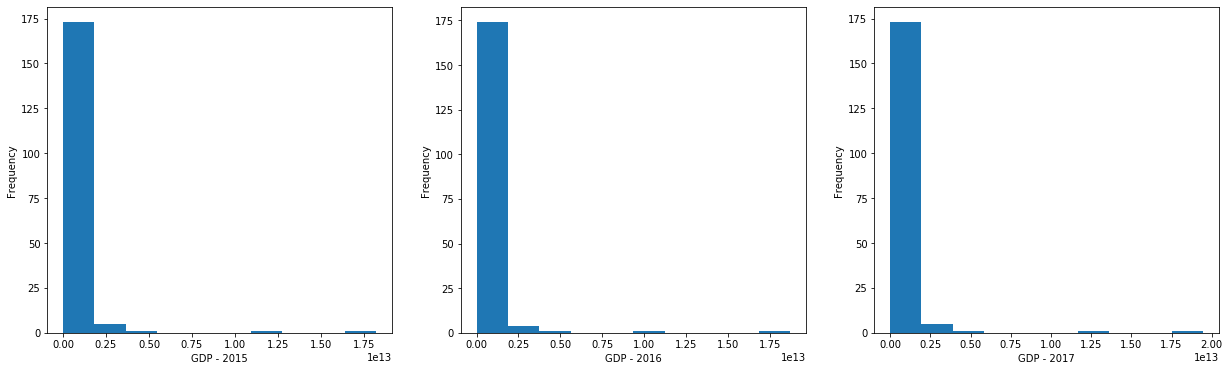

In [22]:
plt.figure(figsize=(21,6))

#Frequency vs GDP-2015
plt.subplot(1, 3, 1)
plt.hist(data["GDP2015"])
plt.xlabel('GDP - 2015')
plt.ylabel('Frequency')

#Frequency vs GDP-2016
plt.subplot(1, 3, 2)
plt.hist(data["GDP2016"])
plt.xlabel('GDP - 2016')
plt.ylabel('Frequency')

#Frequency vs GDP-2017
plt.subplot(1, 3, 3)
plt.hist(data["GDP2017"])
plt.xlabel('GDP - 2017')
plt.ylabel('Frequency')

plt.show()

Data is not `normally distributed` and require `transformation`

In [23]:
#performing transformation
for columnName in ['GDP2015','GDP2016','GDP2017','TP2015','TP2016','TP2017','FP2015','FP2016','FP2017','MP2015','MP2016','MP2017']:
    data[columnName] = data[columnName].apply(np.log)

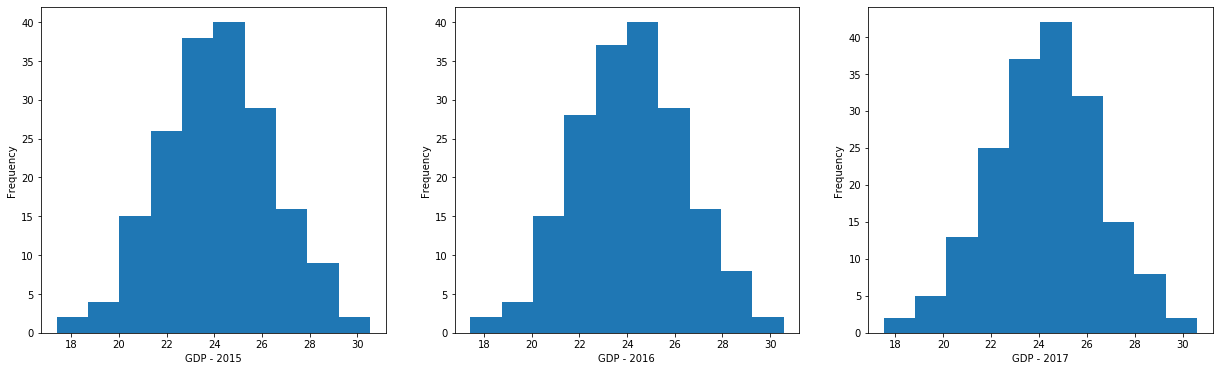

In [24]:
plt.figure(figsize=(21,6))

#Frequency vs GDP-2015
plt.subplot(1, 3, 1)
plt.hist(data["GDP2015"])
plt.xlabel('GDP - 2015')
plt.ylabel('Frequency')

#Frequency vs GDP-2016
plt.subplot(1, 3, 2)
plt.hist(data["GDP2016"])
plt.xlabel('GDP - 2016')
plt.ylabel('Frequency')

#Frequency vs GDP-2017
plt.subplot(1, 3, 3)
plt.hist(data["GDP2017"])
plt.xlabel('GDP - 2017')
plt.ylabel('Frequency')

plt.show()

In [25]:
#shapiro-wilk test
stats.shapiro(data["GDP2015"].apply(np.log))

(0.9936882853507996, 0.6316163539886475)

**Conclusion-2**

* The Shapiro–Wilk test is a test of normality, and our result are in favour of null hypothesis i.e. data is from normal distribution.

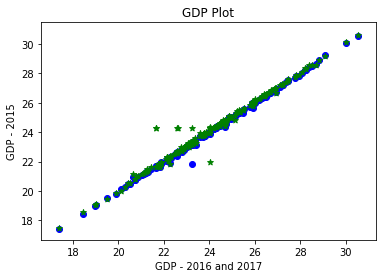

In [26]:
#ploting trend in GDP
plt.scatter(data["GDP2015"], data["GDP2016"], c="blue", marker="o")
plt.scatter(data["GDP2015"], data["GDP2017"], c="green", marker="*")
plt.xlabel('GDP - 2016 and 2017')
plt.ylabel('GDP - 2015')
plt.title('GDP Plot')
plt.show()

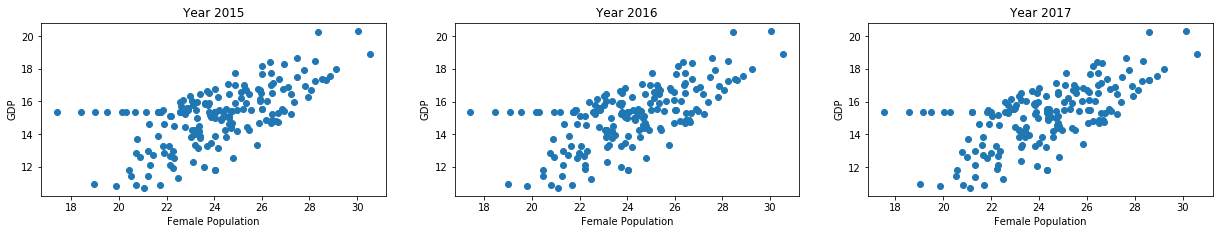

In [27]:
plt.figure(figsize=(21,7))

#female population vs GDP for Year 2015
plt.subplot(2, 3, 1)
plt.scatter(data["GDP2015"], data["FP2015"])
plt.xlabel('Female Population')
plt.ylabel('GDP')
plt.title('Year 2015')

#female population vs GDP for Year 2016
plt.subplot(2, 3, 2)
plt.scatter(data["GDP2016"], data["FP2016"])
plt.xlabel('Female Population')
plt.ylabel('GDP')
plt.title('Year 2016')

#female population vs GDP for Year 2017
plt.subplot(2, 3, 3)
plt.scatter(data["GDP2017"], data["FP2017"])
plt.xlabel('Female Population')
plt.ylabel('GDP')
plt.title('Year 2017')
plt.show()

**Conclusion-3**

* Year 2015-2016-2017 have similar kind of distribution; because of the incremental nature of the countries who are performing well are showing the same type of result in consecutive years.

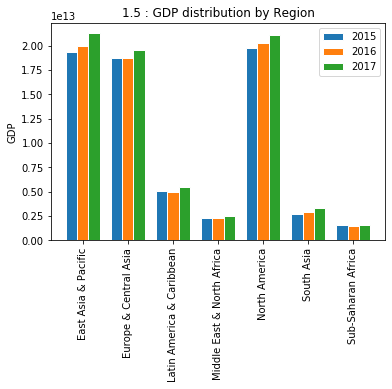

In [28]:
#set height of bar
GDP2015 = list(GDP.groupby(['Region']).sum()["GDP2015"])
GDP2016 = list(GDP.groupby(['Region']).sum()["GDP2016"])
GDP2017 = list(GDP.groupby(['Region']).sum()["GDP2017"])
 
#set position of bar on X axis
pos1 = np.arange(len(GDP2015))
pos2 = [x + 0.25 for x in pos1]
pos3 = [x + 0.25 for x in pos2]
 
#make the plot
plt.bar(pos1, GDP2015, width=0.25, edgecolor='white', label='2015')
plt.bar(pos2, GDP2016, width=0.25, edgecolor='white', label='2016')
plt.bar(pos3, GDP2017, width=0.25, edgecolor='white', label='2017')
 
#add xticks on the middle of the group bars
plt.xticks(rotation=90)
plt.xticks([r + 0.25 for r in range(len(GDP2015))], GDP.groupby(['Region']).sum()["GDP2015"].keys())
 
#create legend and show graphic
plt.ylabel('GDP')
plt.title('1.5 : GDP distribution by Region')
plt.legend()
plt.show()

**Conclusion-4**

* GDP for all the regions is in incremental way (ie GDP-2017 > GDP-2016 > GDP-2015).
* GDP of `North America` and `Asian Region` is much higher compares with other regions; This is because `North America` is having `The United States` and `Asian Region` is having `China` which is contributing in the result.

**The strenght of the relationship - Cohen'1988**

* `No Relationship`: `r=0`
* `Small Relationship`: `0.10< r =<0.30`
* `Medium Relationship`: `0.30< r =<0.50`
* `Large Relationship`: `0.50< r =<1.00`

In [29]:
print("Correlation coffecient for Year 2015 - {}".format(np.corrcoef(data["GDP2015"], data["FP2015"])[0, 1]))

Correlation coffecient for Year 2015 - 0.6407762167889607


In [30]:
print("Correlation coffecient for Year 2016 - {}".format(np.corrcoef(data["GDP2016"], data["FP2016"])[0, 1]))

Correlation coffecient for Year 2016 - 0.6376579556215696


In [31]:
print("Correlation coffecient for Year 2017 - {}".format(np.corrcoef(data["GDP2017"], data["FP2017"])[0, 1]))

Correlation coffecient for Year 2017 - 0.6433184930575786


In [32]:
stats.linregress(data["GDP2017"], data["FP2017"])

LinregressResult(slope=0.5003130703766997, intercept=3.031825254789796, rvalue=0.6433184930575786, pvalue=1.5825410337366263e-22, stderr=0.04450312057904508)

**Conclusion-5**

As we can see that there is `strong statistically significant relationship` between country's women population and its Gross Domastic Product.
>`rvalue = 0.64`
> `pvalue = 1.58`

### 1.4 Preparing Data

In [33]:
#normalization - minmaxscaler
for columnName in ['GDP2015','GDP2016','GDP2017','TP2015','TP2016','TP2017','FP2015','FP2016','FP2017','MP2015','MP2016','MP2017']:
    data[columnName] = (data[columnName] - data[columnName].min())/(data[columnName].max() - data[columnName].min())

In [34]:
#transforming data for model development
A = data[["TP2015","FP2015","GDP2015"]]
B = data[["TP2016","FP2016","GDP2016"]]
C = data[["TP2017","FP2017","GDP2017"]]

A.columns = ["TP","FP","GDP"]
B.columns = ["TP","FP","GDP"]
C.columns = ["TP","FP","GDP"]

modelData = pd.concat([A,B,C])

In [35]:
# Extract feature column 'Text'
X = modelData.drop(["GDP"], axis=1)
# Extract target column 'Class'
y = modelData["GDP"]

In [36]:
#Shuffle and split the dataset into the number of training and testing points
if True: 
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 434 samples.
Testing set has 109 samples.


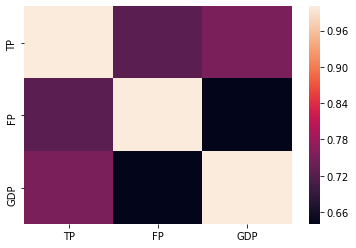

In [37]:
#corellation heatmap betweeen Total Population-Female Population-GDP
sns.heatmap(modelData.corr());

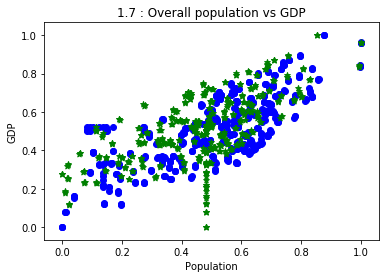

In [38]:
#plotting trend in GDP
plt.scatter(modelData["TP"], modelData["GDP"] , c="blue", marker="o")
plt.scatter(modelData["FP"], modelData["GDP"], c="green", marker="*")
plt.xlabel('Population')
plt.ylabel('GDP')
plt.title('1.7 : Overall population vs GDP')
plt.show()

**Conclusion-6**

* There is `no extreme outliers` and shows `Homoscedasticity`.

### 1.5 Training and Evaluation

In [39]:
#import Linear Regression algorithm
from sklearn.linear_model import LinearRegression

In [40]:
#define Linear Regression
linear = LinearRegression()

In [41]:
#fit training data
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
#test data
linear.score(X_test,y_test)

0.6112031590861333

In [43]:
m1, m2 = linear.coef_
c = linear.intercept_
line = (modelData["TP"]*m1+modelData["FP"]*m2)+ c

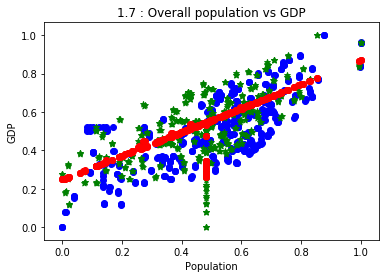

In [44]:
#ploting trend in GDP
plt.scatter(modelData["TP"], modelData["GDP"] , c="blue", marker="o")
plt.scatter(modelData["FP"], modelData["GDP"], c="green", marker="*")
plt.scatter(modelData["FP"], line, color='r')
plt.xlabel('Population')
plt.ylabel('GDP')
plt.title('1.7 : Overall population vs GDP')
plt.show()

**Conclusion-7**

* Our model shows a promising result, although further evaluation and tuning is still required.
* Choice of the model is due to the fact that as per graph `1.7 : Overall population vs GDP` we can see linear pattern in the data.

### 1.6 Result Analysis - Conclusion 

A zero order correlation was used to evaluate the null hypothesis that there There is no statistically significant relationship between country’s women population and its Gross Domestic Product where N=181. Result of Pearson's analysis yielded that there is strong positive correlation between country's women population and its Gross Domestic Product by `rvalue = 0.64` and `pvalue = 1.58.`

> **Research Conclusion** : `The analysis provide evidence in favour of alternative hypothesis`

**Conclusion-1**

* As we can see data is having `Ratio and Interval Data` and represent `random sample`.

**Conclusion-2**

* The Shapiro–Wilk test is a test of normality, and our result are in favour of null hypothesis i.e. data is from normal distribution.

**Conclusion-3**

* Year 2015-2016-2017 have similar kind of distribution; because of the incremental nature of the countries who are performing well are showing the same type of result in consecutive years.

**Conclusion-4**

* GDP for all the regions is in incremental way (ie GDP-2017 > GDP-2016 > GDP-2015).
* GDP of `North America` and `Asian Region` is much higher compares with other regions; This is because `North America` is having `The United States` and `Asian Region` is having `China` which is contributing in the result.

**Conclusion-5**

As we can see that there is `strong statically significant relationship` between country's women population and its Gross Domastic Product.
> `rvalue = 0.64`
> `pvalue = 1.58`

**Conclusion-6**

* There is `no extreme outliers` and shows `Homoscedasticity`.

**Conclusion-7**

* Our model shows a promising result, although further evaluation and tuning is still required.
* Choice of the model is due to the fact that as per graph `1.7 : Overall population vs GDP` we can see linear pattern in the data.